In [3]:
import imaplib
import email
from email.header import decode_header
import base64
import re
import shlex
import ssl
import sys
sys.path.append('/home/stas/PycharmProjects/learner/')
from passwd.mailru import MAIL_PASS, USERNAME

In [4]:
mail_pass = MAIL_PASS
username = USERNAME
imap_server = 'imap.mail.ru'
imap = imaplib.IMAP4_SSL(imap_server)

In [5]:
imap.login(username, mail_pass)

('OK', [b'Authentication successful'])

In [6]:
print(imap.list())

('OK', [b'(\\Inbox) "/" "INBOX"', b'() "/" "&BBoEMgQwBEAEQgQ,BDsEMARCBDA-"', b'() "/" "&BBwEMAQ8BDA-"', b'() "/" "&BB8EPgRHBEIEMA- &BCAEPgRBBEEEOAQ4-"', b'() "/" "&BCAEMAQxBD4EQgQw-"', b'() "/" "&BCIEPgRABDMEPgQyBEsENQ- &BD8EOwQ+BEkEMAQ0BDoEOA-"', b'() "/" "&BBQEPgQ6BEMEPAQ1BD0EQgRL- &BBoEPgQ9BEEEQwQ7BEwEQgQwBD0EQg-+"', b'() "/" "Junk"', b'() "/" "&BBwEPgQxBDgEOwRMBD0ESwQ5- &BBEEMAQ9BDo-"', b'() "/" "&BCIEMAQ9BDoEOA-"', b'() "/" "&BB4EHgQe- \\"&BB0EHwQa- \\"&BBoEPgQ9BEIEMAQ6BEI-\\""', b'() "/" "&BCEEQgQwBD0EOARBBDsEMAQy- &BBIEPgRBBEIEQAQ+BDI-"', b'() "/" "&BBAEHg- \\"&BB0EHwQf- \\"&BCEEOAQzBD0EMAQ7-\\""', b'() "/" "&BB4EHgQe- \\"&BBMEPgRABD4ENA- 77\\""', b'() "/" "&BB4EHgQe- \\"&BCUEMAQ5BCIETQQ6-\\""', b'() "/" "&BBMEPgRBBEMEQQQ7BEMEMwQ4-"', b'() "/" "&BCEEMQQ1BEAEEQQwBD0EOg- &BCAEJA-"', b'() "/" "SberBroker"', b'() "/" "&BBIEIgQR- &BBEEQAQ+BDoENQRA-"', b'() "/" "&BCQEHQQh-"', b'() "/" "&BBAEOwRMBEQEMA- &BBEEMAQ9BDo-"', b'() "/" "&BBAEOwRMBEQEMA- &BBEEQAQ+BDoENQRA-"', b'() "/" "&BBoEGA

In [7]:
with imaplib.IMAP4_SSL(imap_server, ssl_context=ssl.create_default_context()) as mail:
    mail.login(username, mail_pass)
    for folder in mail.list()[1]:
        print(shlex.split(folder.decode())[-1])

INBOX
&BBoEMgQwBEAEQgQ,BDsEMARCBDA-
&BBwEMAQ8BDA-
&BB8EPgRHBEIEMA- &BCAEPgRBBEEEOAQ4-
&BCAEMAQxBD4EQgQw-
&BCIEPgRABDMEPgQyBEsENQ- &BD8EOwQ+BEkEMAQ0BDoEOA-
&BBQEPgQ6BEMEPAQ1BD0EQgRL- &BBoEPgQ9BEEEQwQ7BEwEQgQwBD0EQg-+
Junk
&BBwEPgQxBDgEOwRMBD0ESwQ5- &BBEEMAQ9BDo-
&BCIEMAQ9BDoEOA-
&BB4EHgQe- "&BB0EHwQa- "&BBoEPgQ9BEIEMAQ6BEI-"
&BCEEQgQwBD0EOARBBDsEMAQy- &BBIEPgRBBEIEQAQ+BDI-
&BBAEHg- "&BB0EHwQf- "&BCEEOAQzBD0EMAQ7-"
&BB4EHgQe- "&BBMEPgRABD4ENA- 77"
&BB4EHgQe- "&BCUEMAQ5BCIETQQ6-"
&BBMEPgRBBEMEQQQ7BEMEMwQ4-
&BCEEMQQ1BEAEEQQwBD0EOg- &BCAEJA-
SberBroker
&BBIEIgQR- &BBEEQAQ+BDoENQRA-
&BCQEHQQh-
&BBAEOwRMBEQEMA- &BBEEMAQ9BDo-
&BBAEOwRMBEQEMA- &BBEEQAQ+BDoENQRA-
&BBoEGAQi- &BCQEOAQ9BDAEPQRB- &BBEEQAQ+BDoENQRA-
&BBIEIgQR-
&BCEEPwQwBDw-
&BB4EQgQ,BEAEMAQyBDsENQQ9BD0ESwQ1-
&BCcENQRABD0EPgQyBDgEOgQ4-
&BBoEPgRABDcEOAQ9BDA-
&BBAEQARFBDgEMg-
INBOX/&BCEEOgQ4BDQEOgQ4-
INBOX/Social
INBOX/Newsletters
INBOX/Public services
INBOX/Receipts


In [8]:
imap.select('SberBroker')

('OK', [b'122'])

In [12]:
res, data = imap.search(None, 'ALL')
id_list = data[0].split()
n = 0
# for next_mail_id in id_list:
#     res, data = imap.fetch(next_mail_id, '(RFC822)')
#     msg = email.message_from_bytes(data[0][1])
#     if re.search(r'S03DNRY', str(msg)):
#         # if msg.is_multipart():
#             # n += 1
last_mail = id_list[3]
res, data = imap.fetch(last_mail, '(RFC822)')
msg = email.message_from_bytes(data[0][1])
payload = msg.get_payload()
for part in payload:
    print(part.get_content_type())

text/plain
application/data
application/data


In [13]:
for part in msg.walk():
    print(part.get_content_type())

multipart/mixed
text/plain
application/data
application/data


In [24]:
for part in msg.walk():
    if part.get_content_disposition() == 'attachment' and part.get_filename()[-4:] == 'html' and part.get_filename()[:7] == 'S03DNRY':
        print(part.get_filename())
        print(part)

S03DNRY_170521_170521_D.html
Content-Type: application/data; name="S03DNRY_170521_170521_D.html"
Content-Transfer-Encoding: base64
Content-Disposition: attachment; filename="S03DNRY_170521_170521_D.html"
Content-Description: S03DNRY_170521_170521_D.html

PGh0bWwgeG1sbnM6Zm89Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvWFNML0Zvcm1hdCI+
DQo8SEVBRD4NCjxNRVRBIGh0dHAtZXF1aXY9IkNvbnRlbnQtVHlwZSIgY29udGVudD0i
dGV4dC9odG1sOyBjaGFyc2V0PVVURi04Ij4NCjxUSVRMRT4NCiAgICAgICAg0J7RgtGH
0LXRgiDQsdGA0L7QutC10YDQsCBTMDNETlJZPC9USVRMRT4NCjxzdHlsZT4NCiAgICAg
ICAgcCB7DQogICAgICAgIGZvbnQtd2VpZ2h0OiBib2xkOw0KICAgICAgICB9DQogICAg
ICAgIHAudDEgIHsNCiAgICAgICAgICAgICAgICBmb250LXdlaWdodDogYm9sZDsNCiAg
ICAgICAgICAgICAgICBmb250LXNpemU6IDEwOw0KICAgICAgICAgICAgICAgIH0NCiAg
ICAgICAgdGQgew0KICAgICAgICAgICAgICAgICAgdGV4dC1hbGlnbjogcmlnaHQ7DQog
ICAgICAgIH0NCiAgICAgICAgdGQuYyB7ICANCiAgICAgICAgICAgICAgICAgIHRleHQt
YWxpZ246IGNlbnRlcjsNCiAgICAgICAgICAgICAgICB9DQogICAgICAgIHRkLmwgeyAg
DQogICAgICAgICAgICAgICAgICB0ZXh0LWFsaWduOiBsZWZ0Ow0KICA

In [25]:
part.get_filename()

'S03DNRY_170521_170521_D.html'

<html xmlns:fo="http://www.w3.org/1999/XSL/Format">
<HEAD>
<META http-equiv="Content-Type" content="text/html; charset=UTF-8">
<TITLE>
        Отчет брокера S03DNRY</TITLE>
<style>
        p {
        font-weight: bold;
        }
        p.t1  {
                font-weight: bold;
                font-size: 10;
                }
        td {
                  text-align: right;
        }
        td.c {  
                  text-align: center;
                }
        td.l {  
                  text-align: left;
                }
        td.stamp {
                  text-align: center; 
                  background-position: left;
                  background-image: url("data:image/jpg;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/4QBaRXhpZgAATU0AKgAAAAgABQMBAAUAAAABAAAASgMDAAEAAAABAAAAAFEQAAEAAAABAQAAAFERAAQAAAABAAAOwlESAAQAAAABAAAOwgAAAAAAAYagAACxj//bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjI
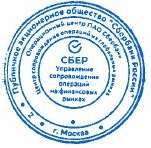

In [26]:
print(base64.b64decode(part.get_payload()).decode())

In [ ]:
with open(part.get_filename(), 'w') as ouf:
    ouf.write(base64.b64decode(part.get_payload()).decode())